## Code for generating SERF relative intramolecular distance map
This script takes two csv input files: 'serf_AFRC_dm.csv' and 'serf_dm.csv'. 'serf_AFRC_dm.csv' is the distance map for the SERF sequence assuming random coil behavior (used as the null model and denominator for distance map normalization) generated using the AFRC commandline implementation. 'serf_dm.csv' is the distance map calculated from all-atom simulations using the 'get_distance_map()' module of Soursop. Generates Figure 2D.

In [8]:
## import packages ##

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import matplotlib.cm as cm

import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [9]:
## load all distance map files ##

afrc = np.loadtxt('serf_AFRC_dm.csv', delimiter = ',')
sim = np.loadtxt('serf_dm.csv', delimiter = ',')


In [10]:
## calculate relative distances ##

norm = sim / afrc

norm_mask = np.nan_to_num(norm, nan = 0)

full_square = norm

/home/usher/miniconda3/envs/labconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
print(np.max(norm_mask))
print(np.min(norm_mask[np.nonzero(norm_mask)]))

1.408999078698094
0.6305361947068797


In [12]:
# set the color bar min and max with based on min and max values AND to make center = 1

barmin = 0.7
barmax = 1.3

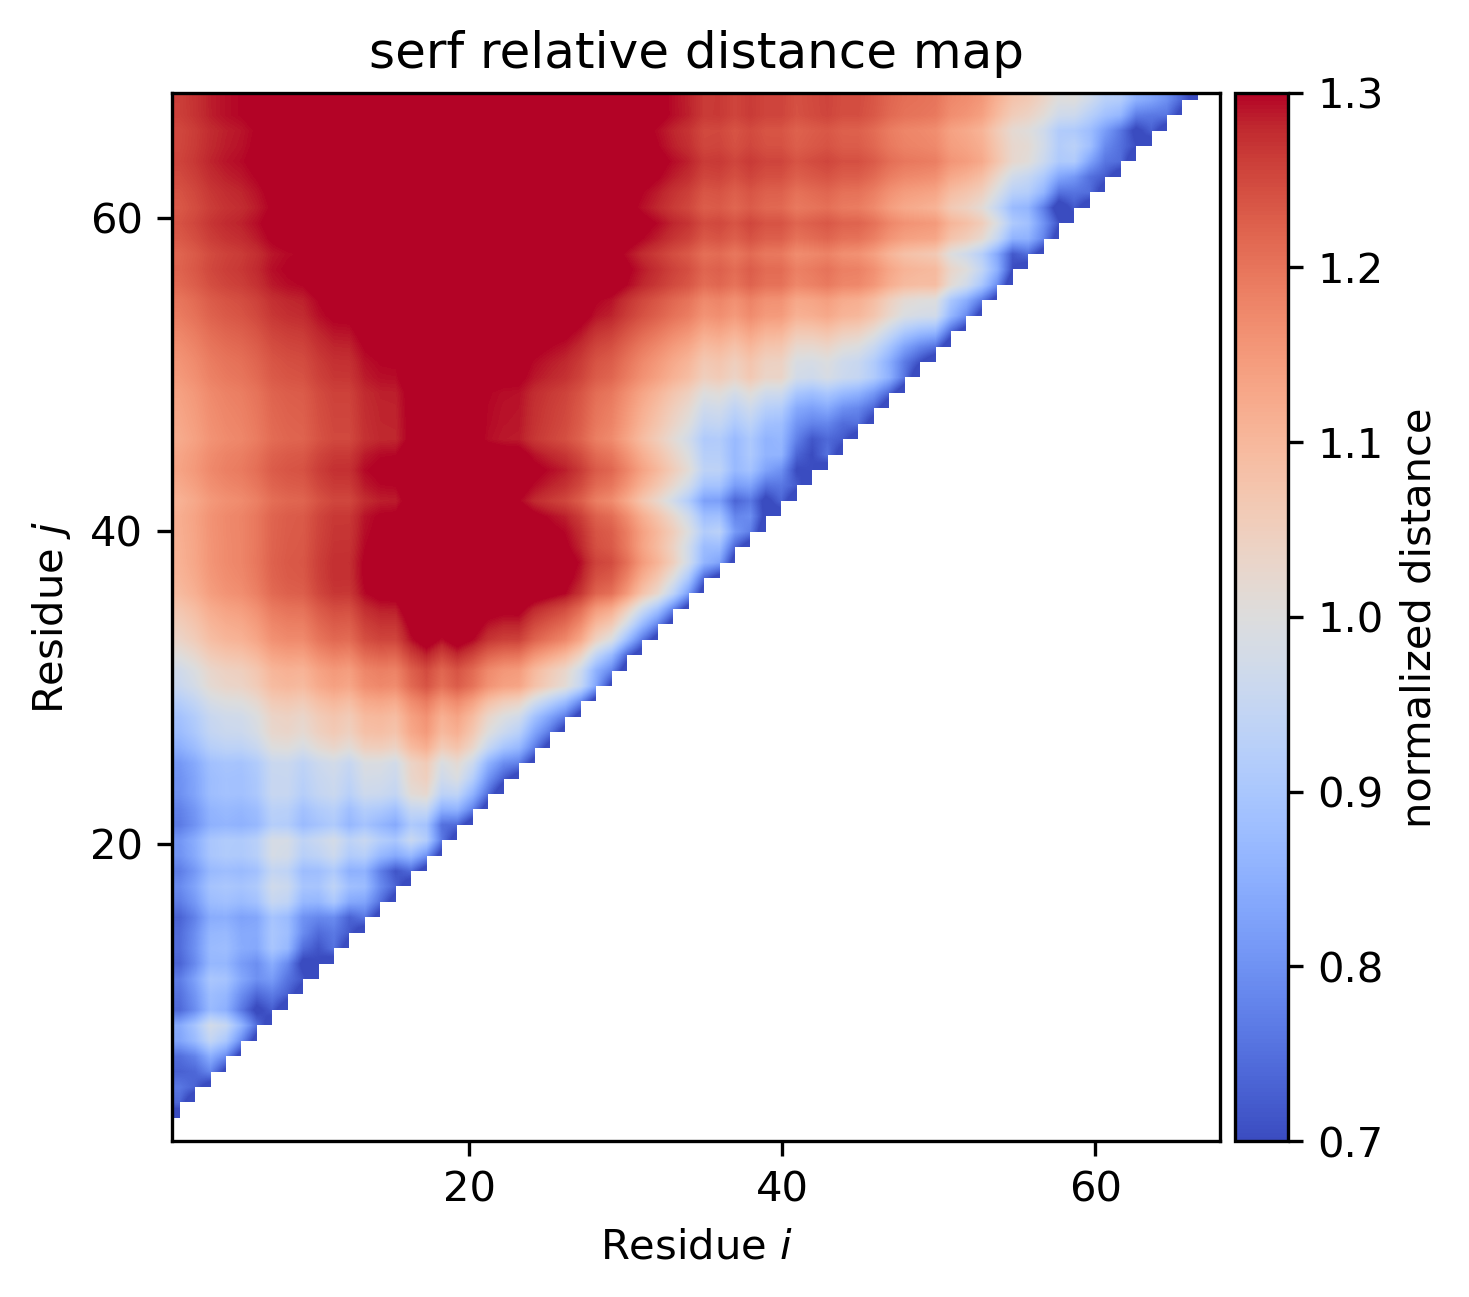

In [13]:
## plot relative distance map for SERF -- generates Figure 2D ##

fig = plt.figure(num = None, figsize = (5, 5), dpi =300, facecolor = 'w', edgecolor = 'k')
ax_list = fig.axes

max_extent = full_square.shape[0]
mapT= full_square.transpose()

# setup colormap #
cmap = copy.copy(matplotlib.cm.get_cmap("coolwarm"))
cmap.set_bad(color='white')
plt.imshow(mapT, cmap = cmap, interpolation = 'bilinear', origin = 'lower', 
                 extent = [1, max_extent, 1, max_extent], vmax = barmax, vmin = barmin)

plt.xlabel('Residue $i$')
plt.ylabel('Residue $j$')

plt.xticks(np.arange(0, full_square.shape[0]+1, 20), fontsize = 10)
plt.yticks(np.arange(0, full_square.shape[0]+1, 20), fontsize = 10)

plt.xlim([1, max_extent])
plt.ylim([1, max_extent])

plt.title('serf relative distance map')

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cb = plt.colorbar(cax = cax)
cb.set_label('normalized distance')

plt.tight_layout()

## UNCOMMENT below to save figure as PDF
#plt.savefig('Figure2D_serf_relative_dm.pdf', format = 'pdf', dpi = 300)

plt.show()